In [1]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
from sklearn import linear_model
from __future__ import division




In [2]:
#Loading the datasets
train =pd.read_csv("C:/Users/Mash/Desktop/Kaggle/Black Friday/train.csv")
test =pd.read_csv("C:/Users/Mash/Desktop/Kaggle/Black Friday/test.csv")
#Exploring the data sets
print (train.info())
#Purchase is the target variable Continuous.Linear regression is to be used.
print (train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A

In [3]:
#checking for null values and filling them with 0 in Product category 2 and Product category 3 and 
#converting them to int datatype
train.Product_Category_2 = train['Product_Category_2'].fillna(0)
train.Product_Category_3 = train['Product_Category_3'].fillna(0)
train.Product_Category_2 = train.Product_Category_2.astype(int)
train.Product_Category_3 = train.Product_Category_3.astype(int)
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Purchase                      550068 non-null int64
dtypes: int32(2), int64(5), object(5)
memory usage: 46.2+ MB
None


In [4]:
#Encoding Object variables and exploring them
number = LabelEncoder()
train.Gender = number.fit_transform(train['Gender'])
test.Gender = number.fit_transform(test['Gender'])

def AgeTransform(value):
    if value == "0-17":
        LAge = 0
        Mage = 9
        UAge = 17
    if value == "18-25":
        LAge = 18
        Mage = 22
        UAge = 25
    if value == "26-35":
        LAge = 26
        Mage = 30
        UAge = 35
    if value == "36-45":
        LAge = 36
        Mage = 40
        UAge = 45
    if value == "46-50":
        LAge = 46
        Mage = 48
        UAge = 50
    if value == "51-55":
        LAge = 51
        Mage = 53
        UAge = 55
    if value == "55+":
        LAge = 55
        Mage = 67
        UAge = 80
    return (LAge,UAge,Mage)


# Creating Lower and Upper Ages for the Age
trAges =train.Age.apply(AgeTransform)
train['Lage'] = [i[0] for i in trAges]
train['Uage'] = [i[1] for i in trAges]
train['Age'] = [i[2] for i in trAges]

#for the test set
teAges =test.Age.apply(AgeTransform)
test['Lage'] = [i[0] for i in teAges]
test['Uage'] = [i[1] for i in teAges]
test['Age'] = [i[2] for i in teAges]

#Encoding City category
train.City_Category = number.fit_transform(train['City_Category'])
test.City_Category = number.fit_transform(test['City_Category'])

#Encoding Products
train.Product_ID = number.fit_transform(train['Product_ID'])
test.Product_ID = number.fit_transform(test['Product_ID'])

print (train.head())

   User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001         672       0    9          10              0   
1  1000001        2376       0    9          10              0   
2  1000001         852       0    9          10              0   
3  1000001         828       0    9          10              0   
4  1000002        2734       1   67          16              2   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Lage  Uage  
0                   0                   0      8370     0    17  
1                   6                  14     15200     0    1

In [5]:
#Since 4+ years could mean anything from 4 to say 10 years taking the median of 4 and 10
train.Stay_In_Current_City_Years = train.Stay_In_Current_City_Years.replace({"4+" : '7'})
test.Stay_In_Current_City_Years = test.Stay_In_Current_City_Years.replace({"4+" : '7'})
print (train.Stay_In_Current_City_Years.unique())

print (train.head())

['2' '7' '3' '1' '0']
   User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001         672       0    9          10              0   
1  1000001        2376       0    9          10              0   
2  1000001         852       0    9          10              0   
3  1000001         828       0    9          10              0   
4  1000002        2734       1   67          16              2   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                          7               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Lage  Uage  
0                   0                   0      8370     0    17  
1                   6                  1

In [6]:
#Since there are no numerical predictor values we are not looking and skewness and adopting transformations.
#Checking the corelation

Corelation = train.corr()
Corelation.sort_values(['Purchase'], ascending = False,inplace = True)
print(Corelation.Purchase)

Purchase              1.000000
Product_Category_3    0.288501
City_Category         0.061914
Gender                0.060346
Product_Category_2    0.052288
Occupation            0.020833
Lage                  0.016296
Age                   0.015439
Uage                  0.014443
User_ID               0.004716
Marital_Status       -0.000463
Product_ID           -0.109345
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


<function matplotlib.pyplot.show>

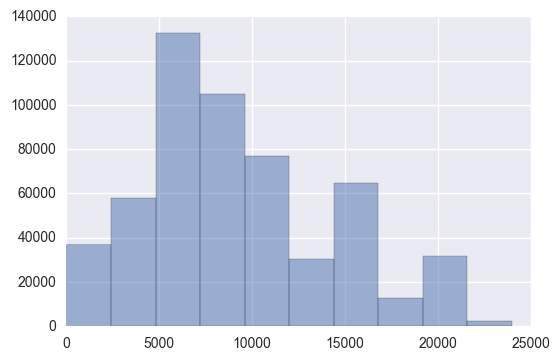

In [7]:
#Understanding the response variable
# right skewed distribution
plt.hist(train.Purchase,alpha = 0.5)
plt.show



<function matplotlib.pyplot.show>

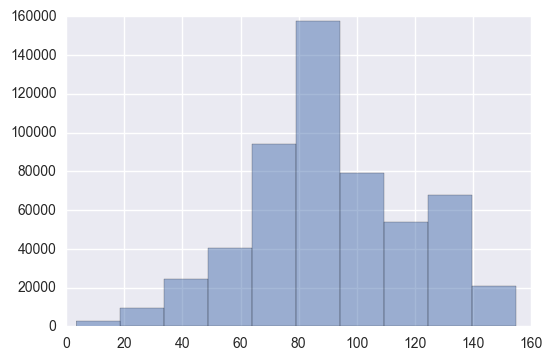

In [8]:
#Taking Square root to make it normal
y = np.sqrt(train["Purchase"].astype('float64'))
plt.hist(y,alpha = 0.5)
plt.show


In [9]:
#Preparing  the data

X = train
X =X.drop(["Purchase"],axis = 1)


Qualitative = ['Product_ID','Gender','Occupation','City_Category',\
                       'Product_Category_1','Product_Category_2','Product_Category_3']

Quantitative = ['Age','Lage','Uage','Stay_In_Current_City_Years']
X.Categorical = X[Qualitative]
X.Numerical = X[Quantitative]

#Get Dummies for the categorical variables
X.Categorical = pd.get_dummies(X.Categorical)
Train = pd.concat([X.Categorical,X.Numerical],axis =1)

In [ ]:
#Plotting a regression  model
from sklearn import metrics
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(Train, y, test_size = 0.30, random_state = 0)
Regr = RandomForestRegressor()
param_grid = {"max_depth": [5,10,None],
                  "max_features": ["auto","log2",0.9],
                  "min_samples_split": [2,4,6],
                  "min_samples_leaf": [1,5],
                  "bootstrap": [True, False],
                  "criterion": ["mse"],
                  "n_estimators": [10,15,18],
                  }

GS = GridSearchCV(Regr,param_grid=param_grid)
Regr = GS.fit(X_train,y_train)
print (Regr.best_params_)

score = cross_val_score(Regr,X,y)
print (score)

In [232]:
#Calculatin RMSE between yhat and y

def RMSE(predicted,actual):
    return np.sqrt(np.sum((predicted-actual)**2)/len(actual))

yhat = (Regr.predict(Train)**2)
print (RMSE(yhat,train.Purchase))

2090.94568687
